In [23]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import datetime
import warnings
from pandas.core.common import SettingWithCopyWarning

In [34]:
#df = pd.read_csv('../../dados/dadosCompletos.csv', sep=';')

In [131]:
col_selecionadas = ['id_animal','data_abate', 'categoria']

In [132]:
df = pd.read_csv('../../dados/dadosCompletos.csv', encoding='ISO-8859-1', sep=';', usecols=col_selecionadas)

In [133]:
df['data_abate'] = pd.to_datetime(df['data_abate'])

### Análise por categoria

In [134]:
def plotCategoria (df):
    #Criando um dataFrame como a quantidade de registros por data
    df_categoria = df.data_abate.value_counts().to_frame().reset_index()
    #renomear as colunas do novo dataframe
    df_categoria.columns = ["data_abate", "quantidade"]
    #Criando colunas para identificar o ano e o mês do abate
    df_categoria['ano'] = df_categoria['data_abate'].dt.year 
    df_categoria['mes'] = df_categoria['data_abate'].dt.month 
    df_categoria_mes = df_categoria.groupby(['ano', 'mes'])['quantidade'].sum().to_frame().reset_index()
    
    #Plotar Gráfico
    palette_mark = ['b',"black"]
    palette = ['#2e86de','#ff7979']
    line = sns.lineplot(
                        data=df_categoria_mes, x="mes", y="quantidade", 
                        style='ano', hue="ano", markers=True, palette = palette)
    line.figure.set_size_inches(15,10)

    for item, color in zip(df_categoria_mes.groupby('ano'), palette_mark):
        #item[1] is a grouped data frame
        for x,y,m in item[1][['mes','quantidade','quantidade']].values:
            line.text(x,y,f'{m:.2f}',color=color)
    

In [135]:
#Criando uma selação apenas com os registro que possuiem categoria AAA
selecao_categoria = df.query('categoria == "AAA"')

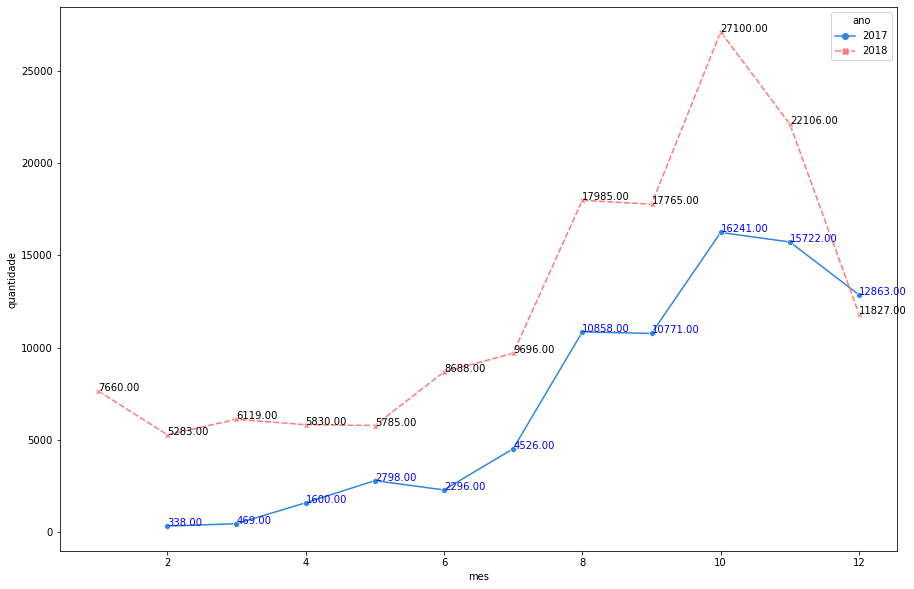

In [136]:
plotCategoria(selecao_categoria)

In [137]:
#Criando uma selação apenas com os registro que possuiem categoria AA
selecao_categoria = df.query('categoria == "AA"')

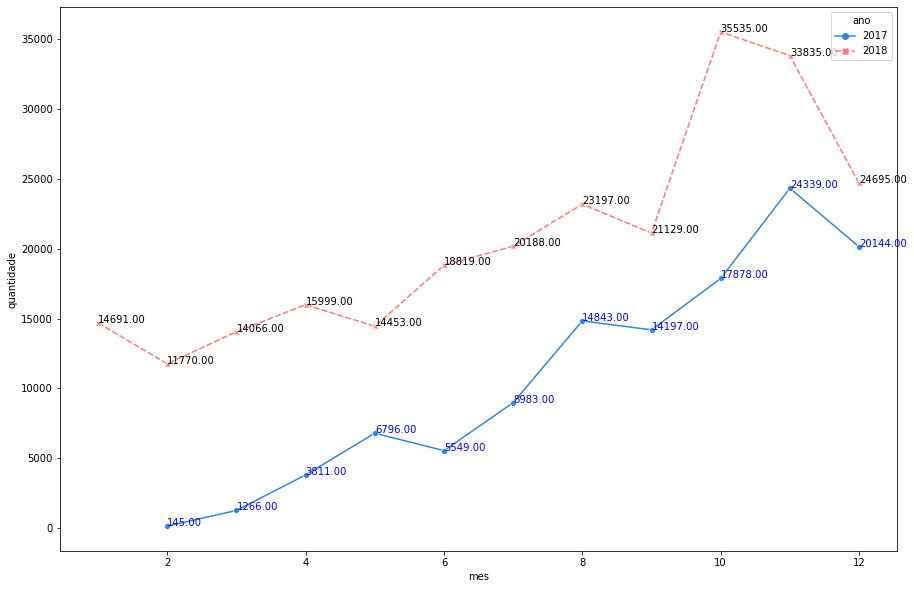

In [138]:
plotCategoria(selecao_categoria)

In [111]:
#Criando uma selação apenas com os registro que possuiem categoria AA
selecao_categoria = df.query('categoria == "BBB"')

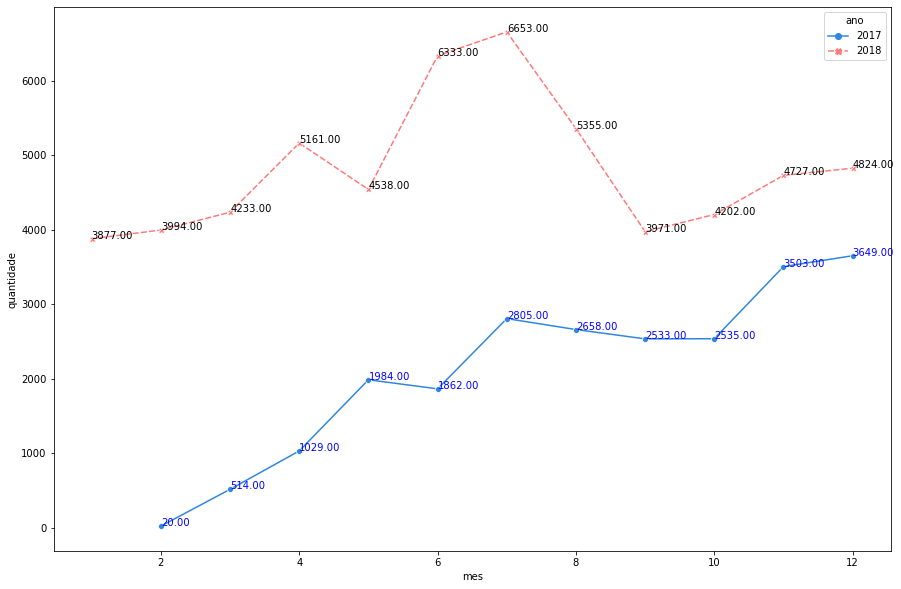

In [112]:
plotCategoria(selecao_categoria)

In [113]:
#Criando uma selação apenas com os registro que possuiem categoria AA
selecao_categoria = df.query('categoria == "BB"')

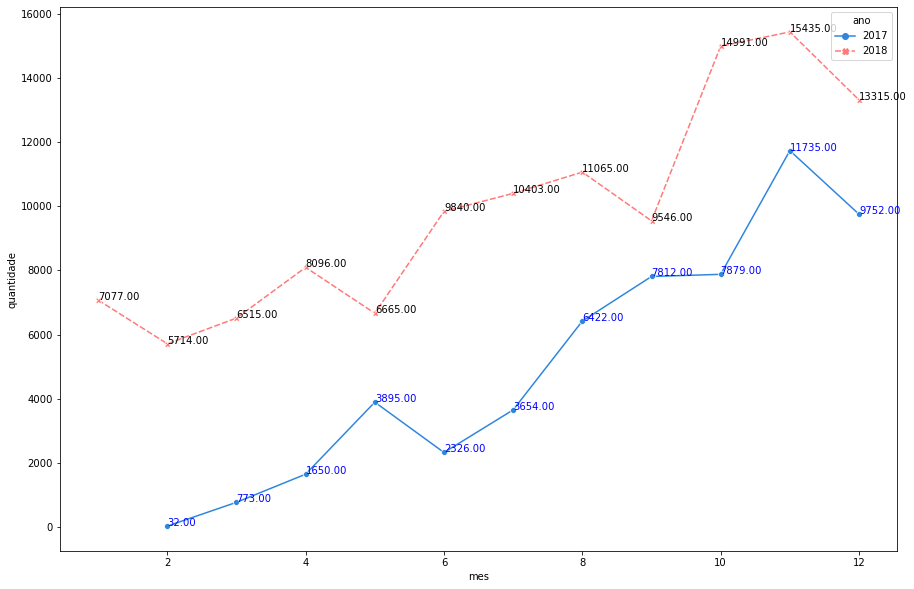

In [114]:
plotCategoria(selecao_categoria)

In [115]:
#Criando uma selação apenas com os registro que possuiem categoria AA
selecao_categoria = df.query('categoria == "C"')

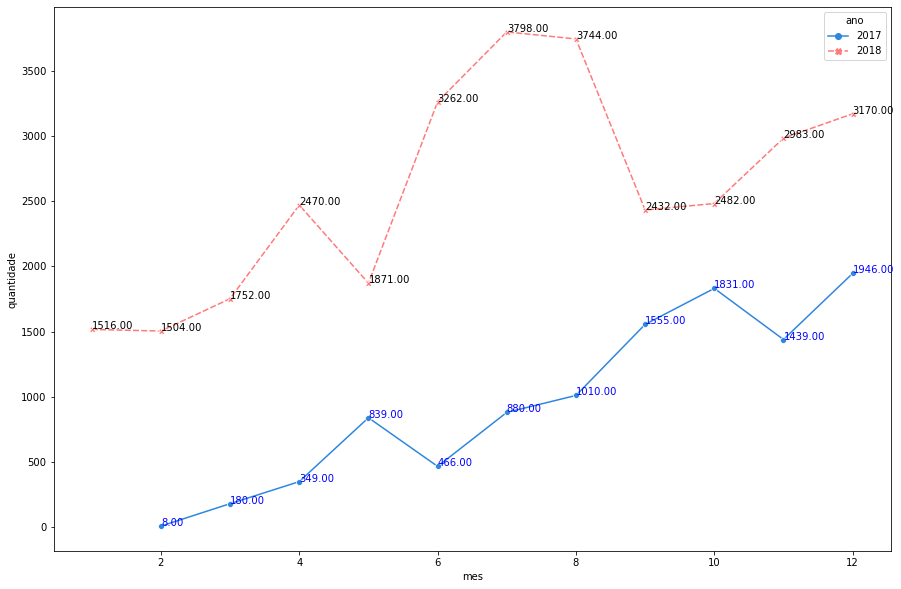

In [116]:
plotCategoria(selecao_categoria)

In [117]:
#Criando uma selação apenas com os registro que possuiem categoria AA
selecao_categoria = df.query('categoria == "D"')

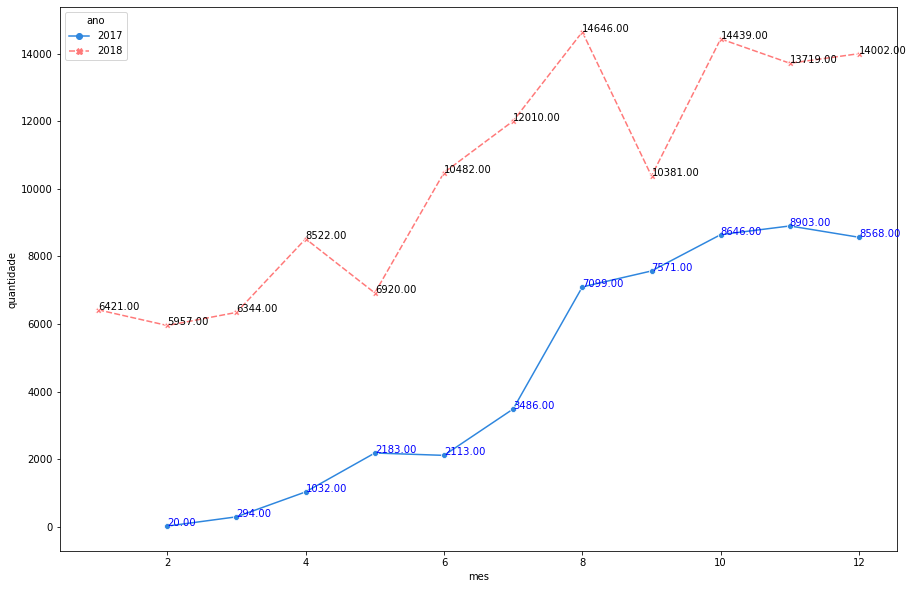

In [118]:
plotCategoria(selecao_categoria)

### Categorias por Ano

In [150]:
df['ano'] = df['data_abate'].dt.year 
df['mes'] = df['data_abate'].dt.month

In [169]:
df.head(5)

,id_animal,data_abate,categoria,ano,mes
0,1,2017-02-09,D,2017,2
1,2,2017-02-09,BBB,2017,2
2,3,2017-02-09,AA,2017,2
3,4,2017-02-09,D,2017,2
4,5,2017-02-09,BB,2017,2


In [155]:
categorias_por_ano = df.drop(['id_animal','data_abate','ano'], axis=1)

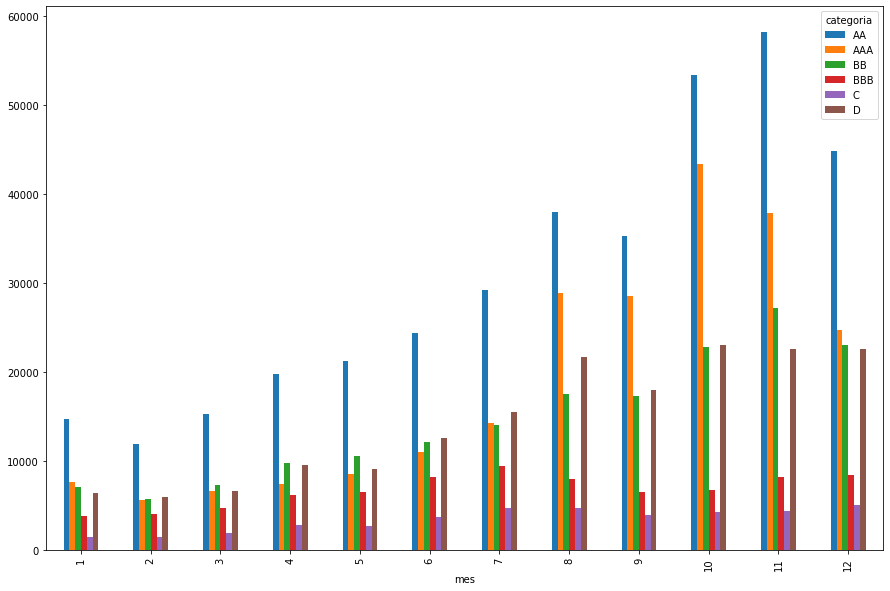

In [168]:
categorias_por_ano = df.groupby(['mes', 'categoria']).size().unstack(1).fillna(0).plot(kind='bar', figsize=(15,10))